# **Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **Import Library**

In [3]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **Memuat Dataset**

In [28]:
#Memuat dataaset menggunakan pandas
df = pd.read_csv('adult_income.csv')
df

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [32]:
# Menghapus kolom yang tidak digunakan 
df.columns = df.columns.str.strip()
df = df.drop(columns=['capital-gain', 'capital-loss'])
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States


# **Exploratory Data Analysis (EDA)**

### Struktur Data yang diamati

In [33]:
# Memahami Struktur Data yang digunakan 
# Meninjau jumlah baris, kolom tipe data dan jenis data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [34]:
numeric_features = df.select_dtypes(include=['number'])

In [35]:
categorical_features = df.select_dtypes(include=['object'])

Dataset ini terdiri dari 13 kolom dengan 48842 baris. Setiap kolom pada dataset ini memiliki nilai non-null sehingga sudah baik untuk ditangani lebih lanjut. Untuk tipe data sudah ada data dengan tipe numerikal (int64) dan tipe kategorikal (object)

### Menangani Data yang Hilang

In [36]:
df.nunique()

Unnamed: 0         48842
age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
hours-per-week        96
native-country        42
dtype: int64

In [37]:
# Melakukan pemeriksaan jumlah data yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [38]:
# Memeriksa data duplicate 
df['isDuplicate'] = df.duplicated()
df

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,isDuplicate
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,False
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,False
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,False
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,False
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,False
48838,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,False
48839,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,False
48840,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,False


Dikarenakan dari hasil peninjauan tidak ditemukan data yang hilang dan duplikat maka langkah ini tidak dilakukan, tetapi jika ditemukan data yang hilang maka proses penanganan yang dapat dilakukan adalah dengan menghapus data yang hilang tersebut atau menggantinya dengan nilai yang sering muncul.

### Analisis Distribusi dan Korelasi Variabel Numerik

In [51]:
# Menampilkan statistik deskriptif dari dataset 
numeric_features.describe(include='all')

,Unnamed: 0,age,fnlwgt,educational-num,hours-per-week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000
mean,24420.500000,38.643585,1.896641e+05,10.078089,40.422382
std,14099.615261,13.710510,1.056040e+05,2.570973,12.391444
min,0.000000,17.000000,1.228500e+04,1.000000,1.000000
25%,12210.250000,28.000000,1.175505e+05,9.000000,40.000000
50%,24420.500000,37.000000,1.781445e+05,10.000000,40.000000
75%,36630.750000,48.000000,2.376420e+05,12.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99.000000


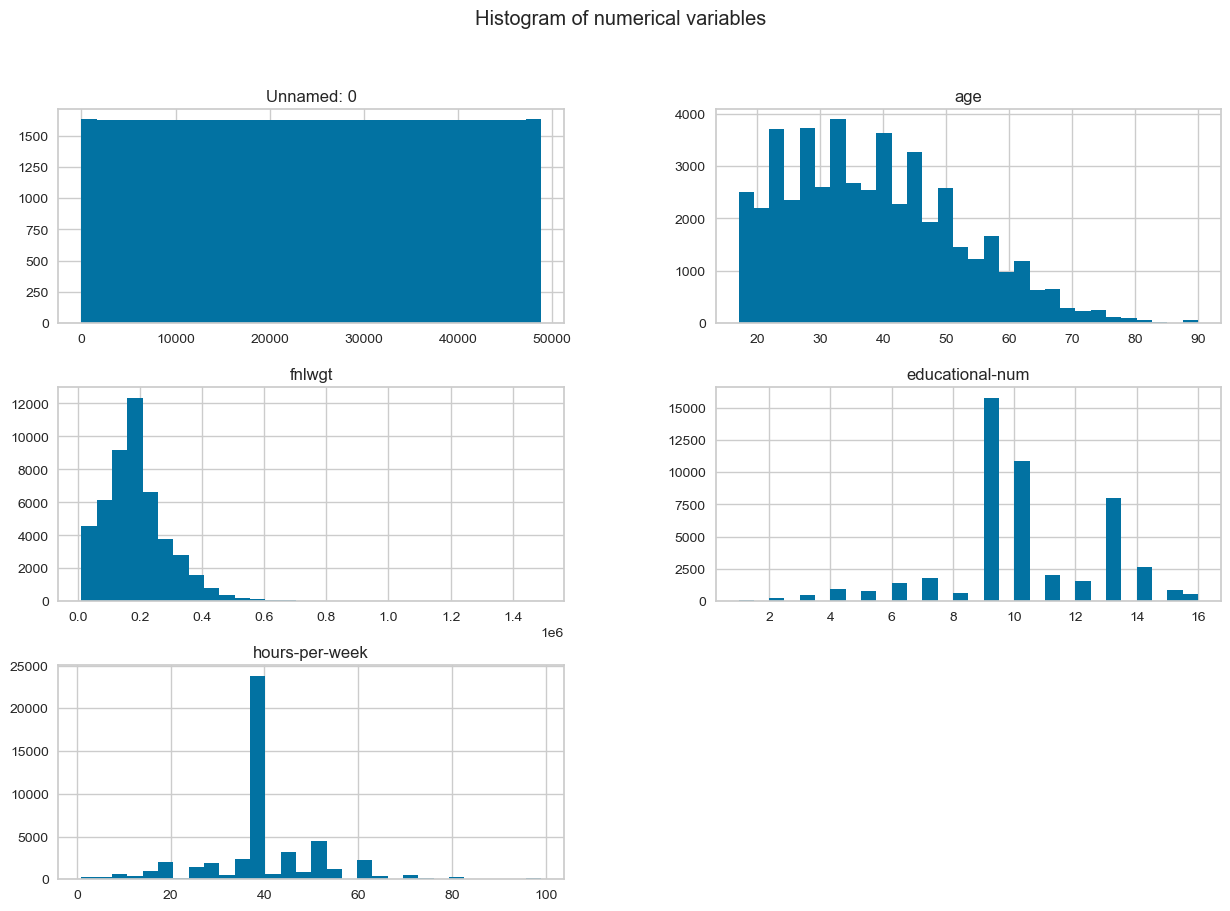

In [40]:
# Menampilkan histogram untuk distribusi frekuensi
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Histogram of numerical variables')
plt.show()

In [41]:
# Memeriksa hubungan variabel dengan menggunakan matriks korelasi
correlation_matrix = numeric_features.corr()
print(f'Correlation Matrix : {correlation_matrix}')

Correlation Matrix :                  Unnamed: 0       age    fnlwgt  educational-num  \
Unnamed: 0         1.000000 -0.003973  0.001435         0.001213   
age               -0.003973  1.000000 -0.076628         0.030940   
fnlwgt             0.001435 -0.076628  1.000000        -0.038761   
educational-num    0.001213  0.030940 -0.038761         1.000000   
hours-per-week     0.001497  0.071558 -0.013519         0.143689   

                 hours-per-week  
Unnamed: 0             0.001497  
age                    0.071558  
fnlwgt                -0.013519  
educational-num        0.143689  
hours-per-week         1.000000  


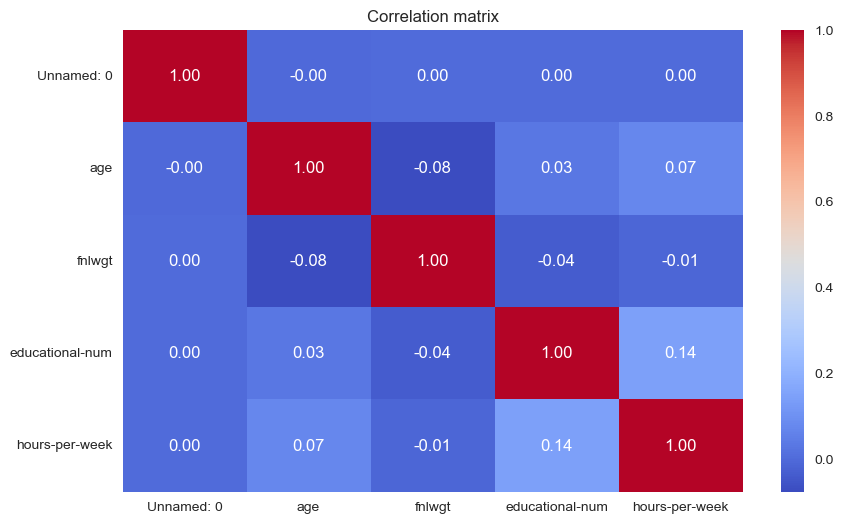

In [42]:
# Visualisasi matriks korelasi menggunakan heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

### Visualisasi Data variabel Kategorikal

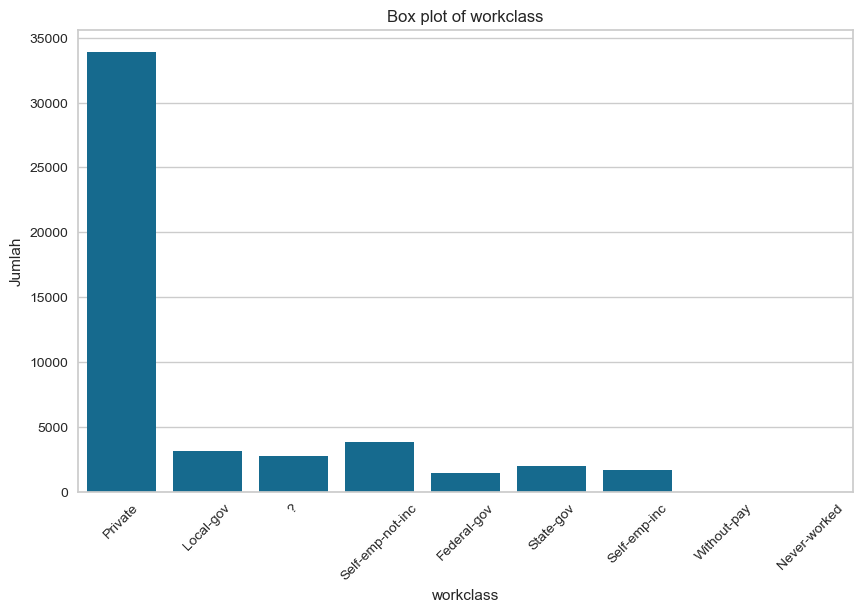

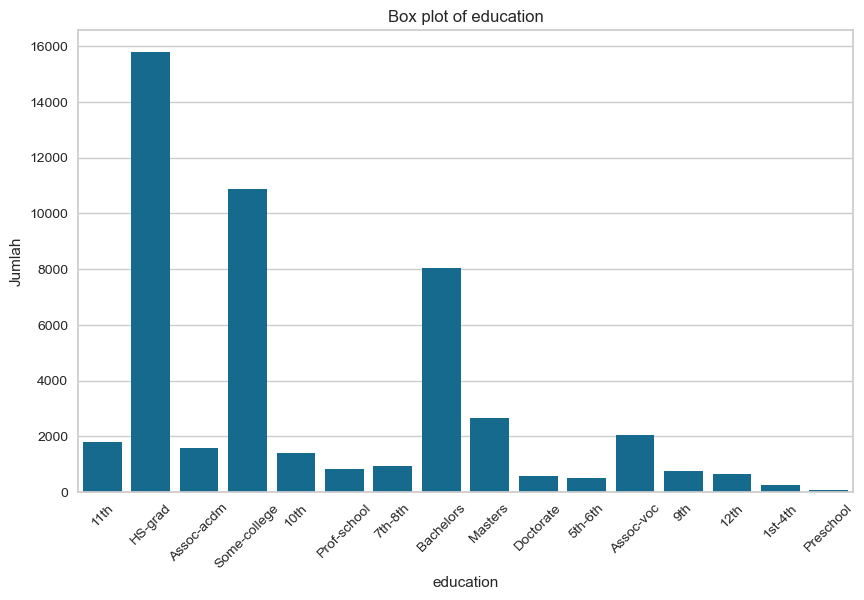

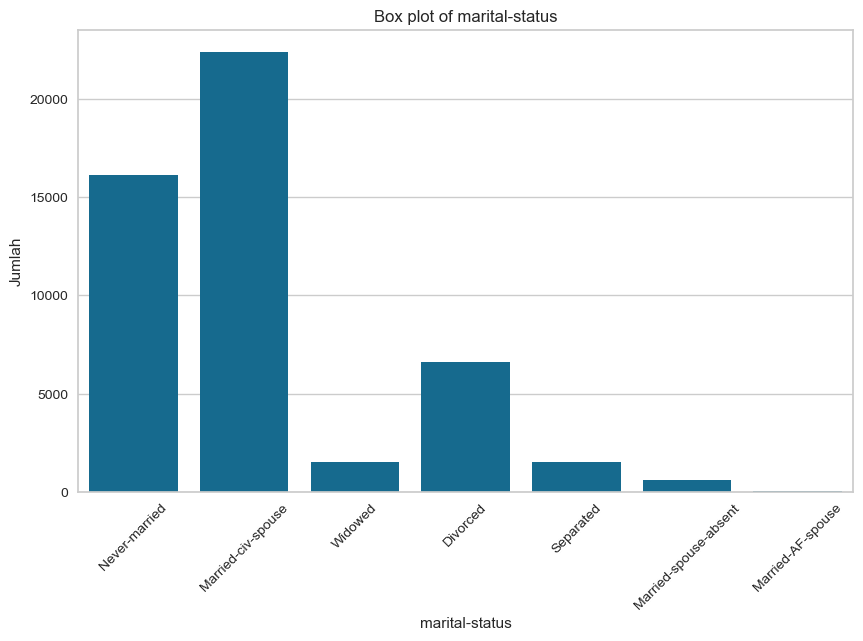

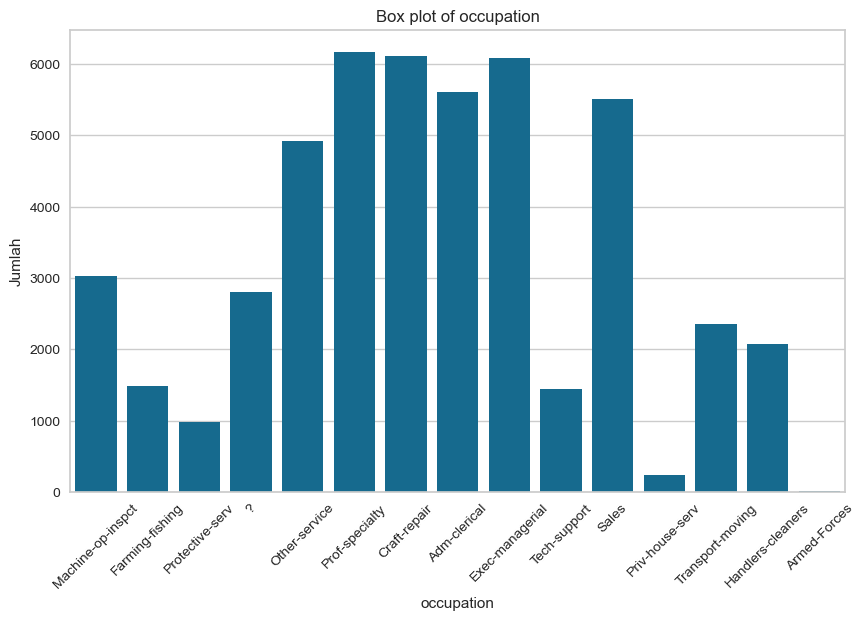

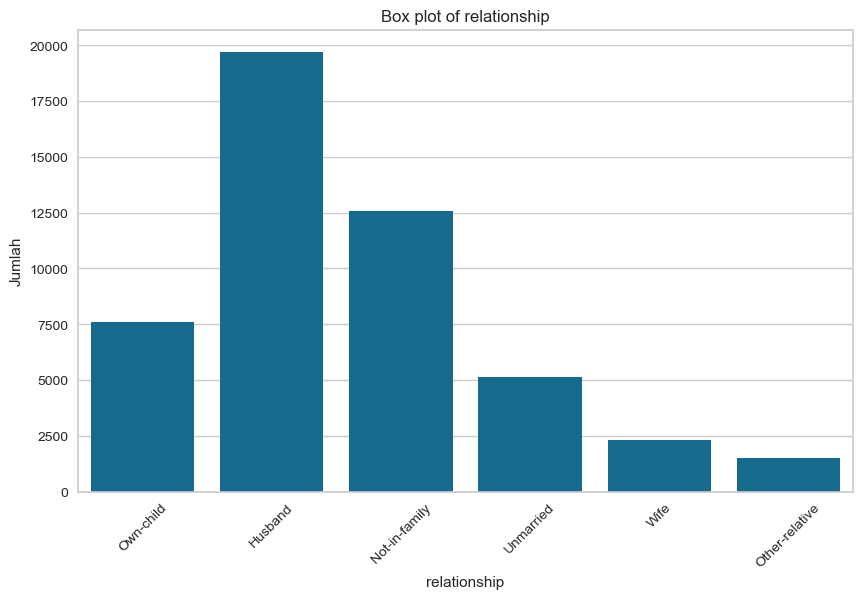

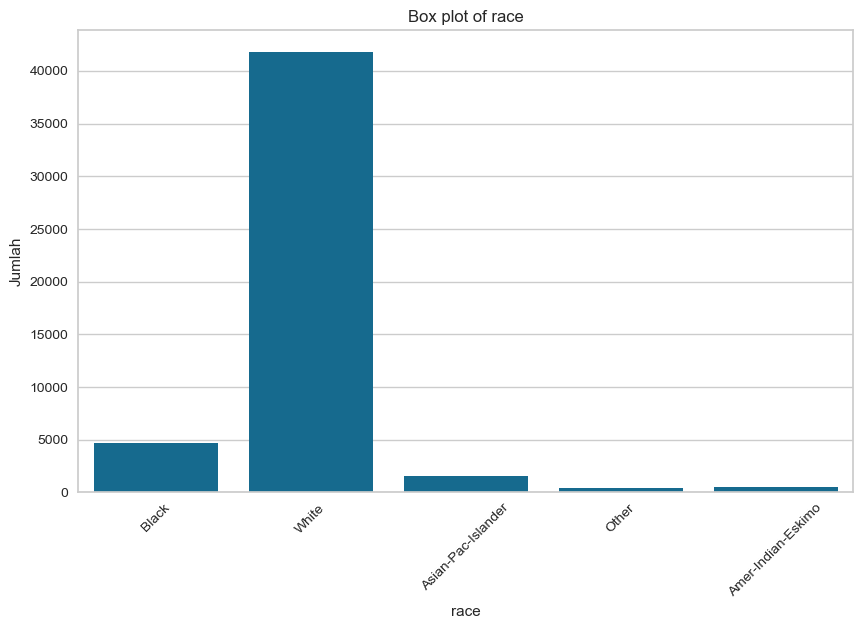

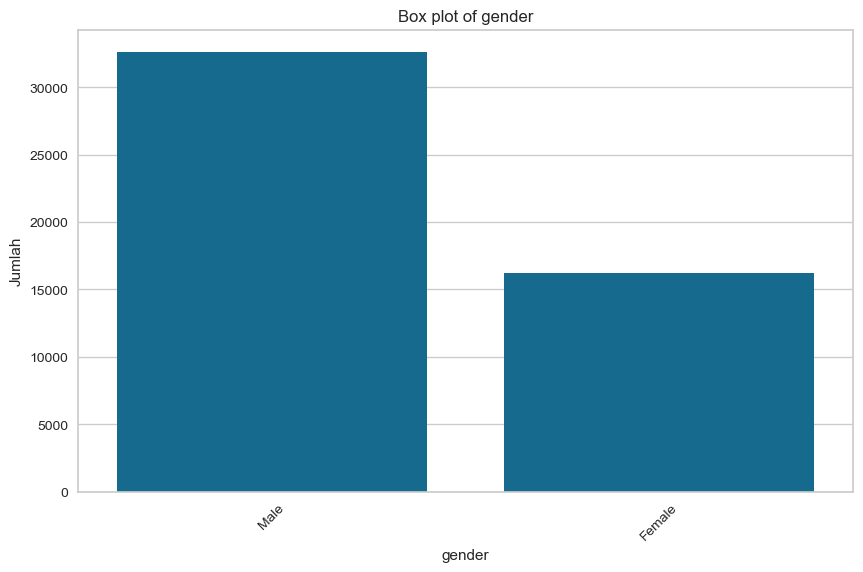

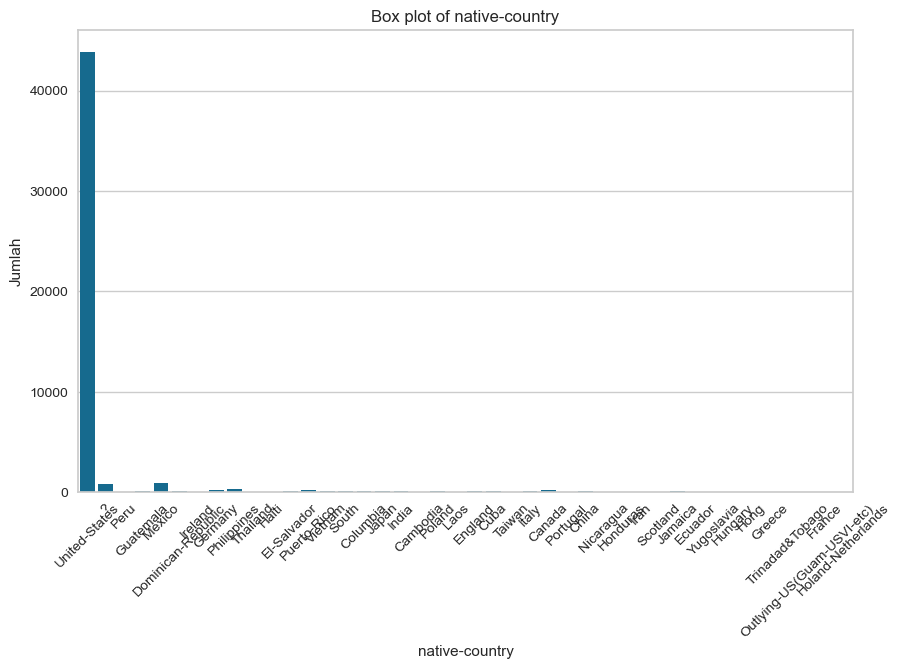

In [49]:
# Bar plot untuk data kategorikal 
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

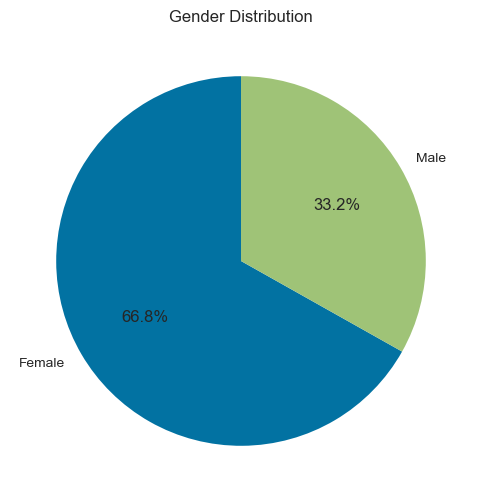

In [50]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi 
plt.figure(figsize=(10, 6))
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Hasil menunjukkan berbagai hasil analisis distribusi frekuensi sesuai dengan hasil yang ada. Temuan lainnya ialah korelasi antara setiap variabel yang mana dapat di lihat pada matrix korelasi yang dapat disimpulkan bahwa hubungan antar setiap variabel memiliki nilai yang lemah hingga sangat lemah sekitar <= 0.1, selain itu dilakukan juga visualisasi untuk data kategorikal.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,isDuplicate
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,False
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,False
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,False
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,False
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,False
48838,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,False
48839,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,False
48840,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,False


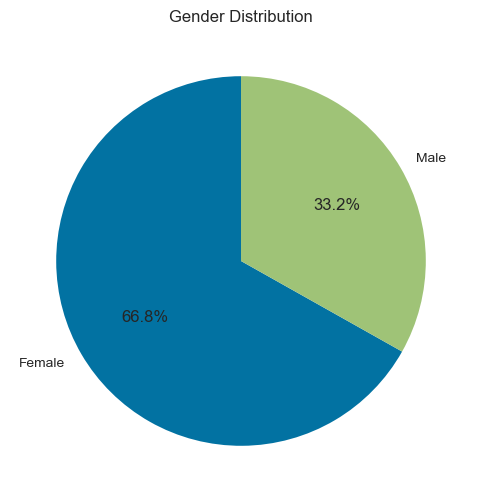

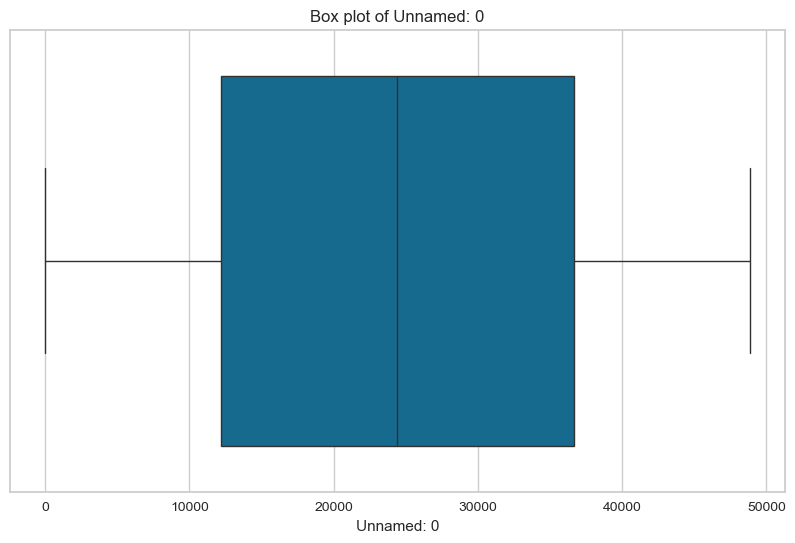

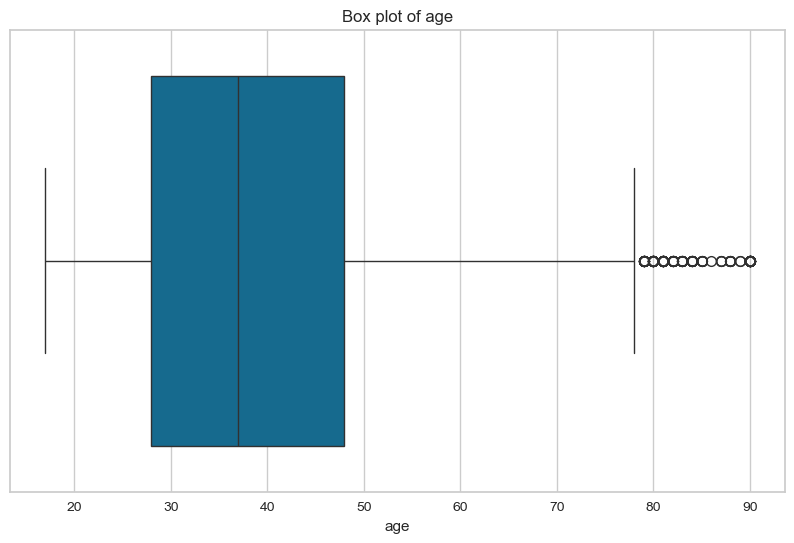

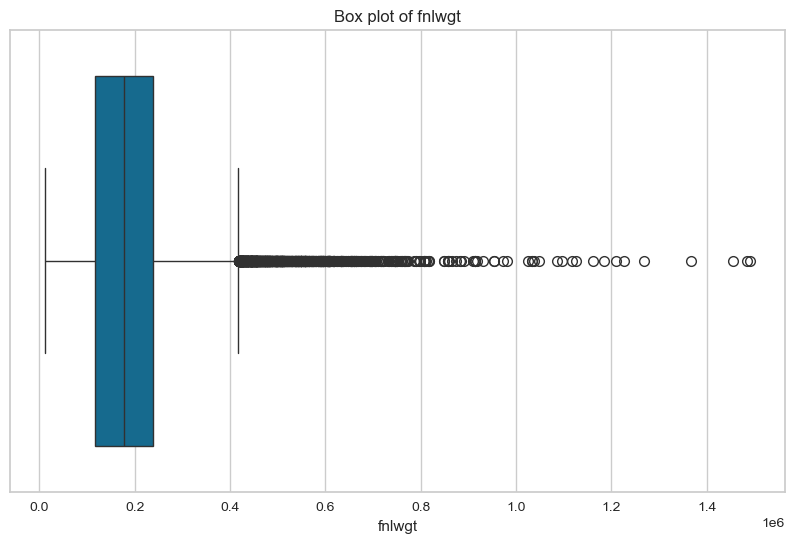

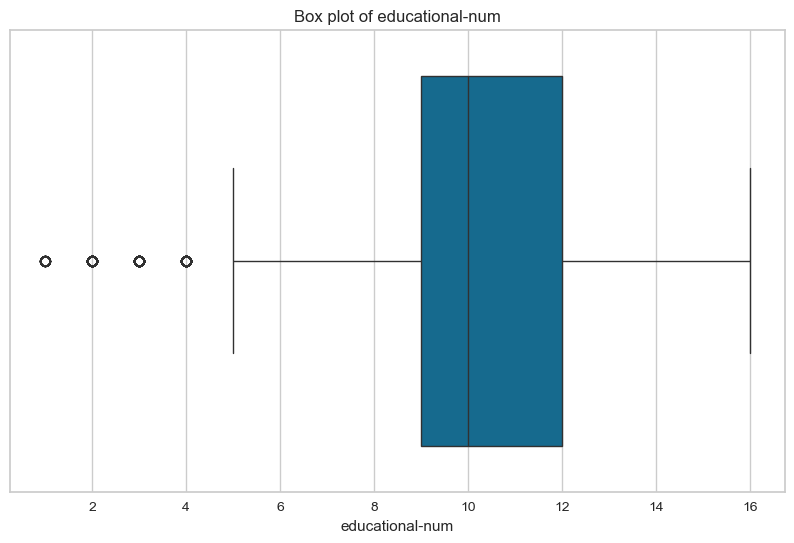

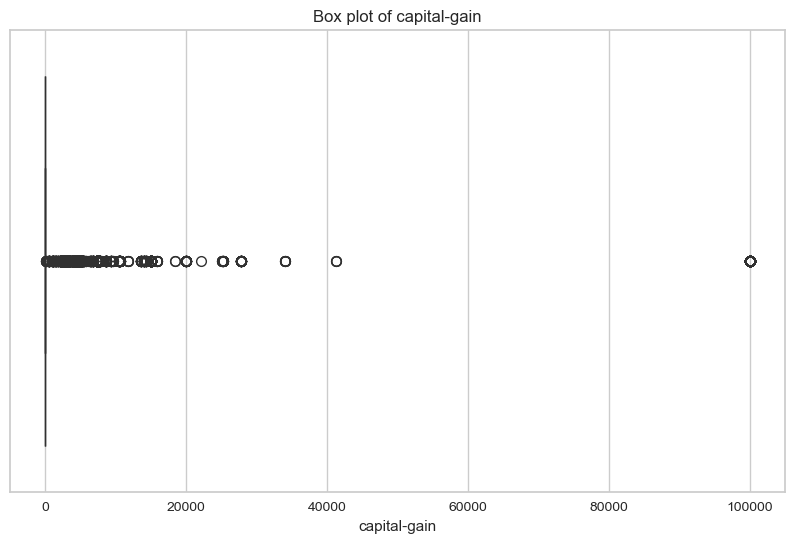

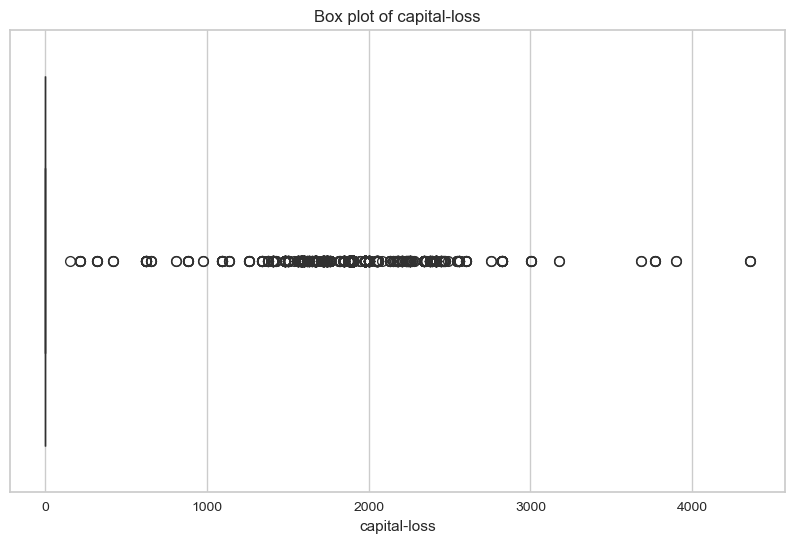

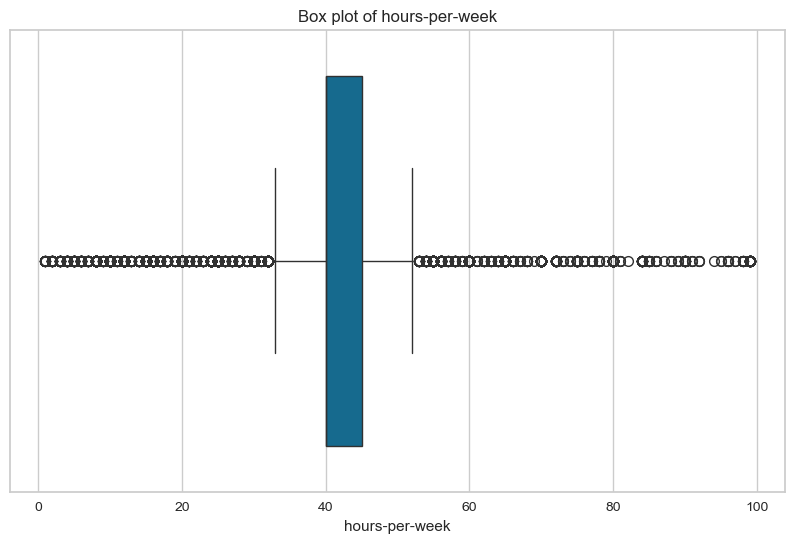

In [20]:
# Memeriksa Outlier
for feature in numeric_features: 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,isDuplicate
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,False
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,False
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,False
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,False
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,False
48838,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,False
48839,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,False
48840,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,False


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

Data baru telah berhasil disimpan!
